# Sleep Disorder Diagnosis Dataset Analysis

## Overview
The **Sleep Disorder Diagnosis Dataset** or **Sleep Health and Lifestyle Dataset** contains **374 rows and 13 columns**, capturing details about sleep patterns, lifestyle habits, and related health indicators. It was designed to support research and educational projects in health analytics, data science, and machine learning.  

This dataset is **synthetic**, created for illustrative purposes, and does not represent real individuals.

---

## Dataset Features

| Column | Description |
|--------|-------------|
| **Person ID** | Unique identifier for each individual. |
| **Gender** | Gender of the person (Male/Female). |
| **Age** | Age in years. |
| **Occupation** | Profession or job category. |
| **Sleep Duration (hours)** | Number of hours slept per day. |
| **Quality of Sleep (1–10)** | Subjective sleep quality rating from 1 (poor) to 10 (excellent). |
| **Physical Activity Level (minutes/day)** | Daily physical activity duration. |
| **Stress Level (1–10)** | Subjective stress rating from 1 (low) to 10 (high). |
| **BMI Category** | Body Mass Index classification (Underweight, Normal, Overweight). |
| **Blood Pressure (systolic/diastolic)** | Measured in mmHg, formatted as systolic/diastolic. |
| **Heart Rate (bpm)** | Resting heart rate in beats per minute. |
| **Daily Steps** | Number of steps taken daily. |
| **Sleep Disorder** | Presence of sleep disorder: None, Insomnia, or Sleep Apnea. |

---

## Sleep Disorder Categories

- **None**: No sleep disorder identified.  
- **Insomnia**: Difficulty falling or staying asleep, resulting in poor sleep quality.  
- **Sleep Apnea**: Breathing interruptions during sleep that may cause serious health risks.  

---


## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 1. INITIAL DATA EXPLORATION

In [2]:
# Load the dataset
print("=" * 80)
print("LOADING DATASET")
print("=" * 80)
df = pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
# df = pd.read_csv('/kaggle/input/sleep-disorder-diagnosis-dataset/Sleep_health_and_lifestyle_dataset.csv')

# ==========================================
# 1. INITIAL DATA EXPLORATION
# ==========================================
print("\n" + "=" * 80)
print("1. INITIAL DATA EXPLORATION")
print("=" * 80)

print("\nDataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
print(df.head())

print("\nBasic Information:")
print(df.info())

LOADING DATASET

1. INITIAL DATA EXPLORATION

Dataset Shape: (374, 13)

Column Names and Types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

First 5 rows:
   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Ph

## 2. DATA QUALITY ASSESSMENT

In [3]:
# ==========================================
# 2. DATA QUALITY ASSESSMENT
# ==========================================
print("\n" + "=" * 80)
print("2. DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "No missing values found!")

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Check unique values for categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Person ID':
        print(f"\n{col}:")
        print(df[col].value_counts())


2. DATA QUALITY ASSESSMENT

Missing Values:
Sleep Disorder    219
dtype: int64

Duplicate Rows: 0

Unique Values in Categorical Columns:

Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64

Occupation:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

BMI Category:
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Blood Pressure:
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
11

## 3. DATA PREPROCESSING

In [4]:
# ==========================================
# 3. DATA PREPROCESSING
# ==========================================
print("\n" + "=" * 80)
print("3. DATA PREPROCESSING")
print("=" * 80)

# Parse Blood Pressure into systolic and diastolic
print("\nParsing Blood Pressure into Systolic and Diastolic...")
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

# Convert Sleep Disorder to binary (has disorder vs no disorder)
df['Has_Sleep_Disorder'] = df['Sleep Disorder'].apply(lambda x: 0 if x == 'None' or pd.isna(x) else 1)

print("New columns added: Systolic_BP, Diastolic_BP, Has_Sleep_Disorder")


3. DATA PREPROCESSING

Parsing Blood Pressure into Systolic and Diastolic...
New columns added: Systolic_BP, Diastolic_BP, Has_Sleep_Disorder


## 4. STATISTICAL SUMMARY

In [5]:
# ==========================================
# 4. STATISTICAL SUMMARY
# ==========================================
print("\n" + "=" * 80)
print("4. STATISTICAL SUMMARY")
print("=" * 80)

# Summary statistics for numerical columns
print("\nNumerical Variables Summary:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe().round(2))

# Additional statistics
print("\nAdditional Statistics:")
for col in ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Physical Activity Level']:
    print(f"\n{col}:")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Variance: {df[col].var():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")


4. STATISTICAL SUMMARY

Numerical Variables Summary:
       Person ID     Age  Sleep Duration  Quality of Sleep  \
count     374.00  374.00          374.00            374.00   
mean      187.50   42.18            7.13              7.31   
std       108.11    8.67            0.80              1.20   
min         1.00   27.00            5.80              4.00   
25%        94.25   35.25            6.40              6.00   
50%       187.50   43.00            7.20              7.00   
75%       280.75   50.00            7.80              8.00   
max       374.00   59.00            8.50              9.00   

       Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
count                   374.00        374.00      374.00       374.00   
mean                     59.17          5.39       70.17      6816.84   
std                      20.83          1.77        4.14      1617.92   
min                      30.00          3.00       65.00      3000.00   
25%                   

## 5. CORRELATION ANALYSIS

In [6]:
# ==========================================
# 5. CORRELATION ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("5. CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
correlation_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                    'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']
corr_matrix = df[correlation_cols].corr()

# Find strongest correlations
print("\nStrongest Correlations (|r| > 0.3):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.3:
            print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

# Key correlations with Sleep Quality
print("\nCorrelations with Sleep Quality:")
sleep_quality_corr = corr_matrix['Quality of Sleep'].sort_values(ascending=False)
print(sleep_quality_corr[sleep_quality_corr.index != 'Quality of Sleep'])


5. CORRELATION ANALYSIS

Strongest Correlations (|r| > 0.3):
Age <-> Sleep Duration: 0.345
Age <-> Quality of Sleep: 0.474
Age <-> Stress Level: -0.422
Age <-> Systolic_BP: 0.606
Age <-> Diastolic_BP: 0.594
Sleep Duration <-> Quality of Sleep: 0.883
Sleep Duration <-> Stress Level: -0.811
Sleep Duration <-> Heart Rate: -0.516
Quality of Sleep <-> Stress Level: -0.899
Quality of Sleep <-> Heart Rate: -0.660
Physical Activity Level <-> Daily Steps: 0.773
Physical Activity Level <-> Diastolic_BP: 0.383
Stress Level <-> Heart Rate: 0.670
Systolic_BP <-> Diastolic_BP: 0.973

Correlations with Sleep Quality:
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Diastolic_BP              -0.110151
Systolic_BP               -0.121632
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


## 6. VISUALIZATIONS


6. CREATING VISUALIZATIONS


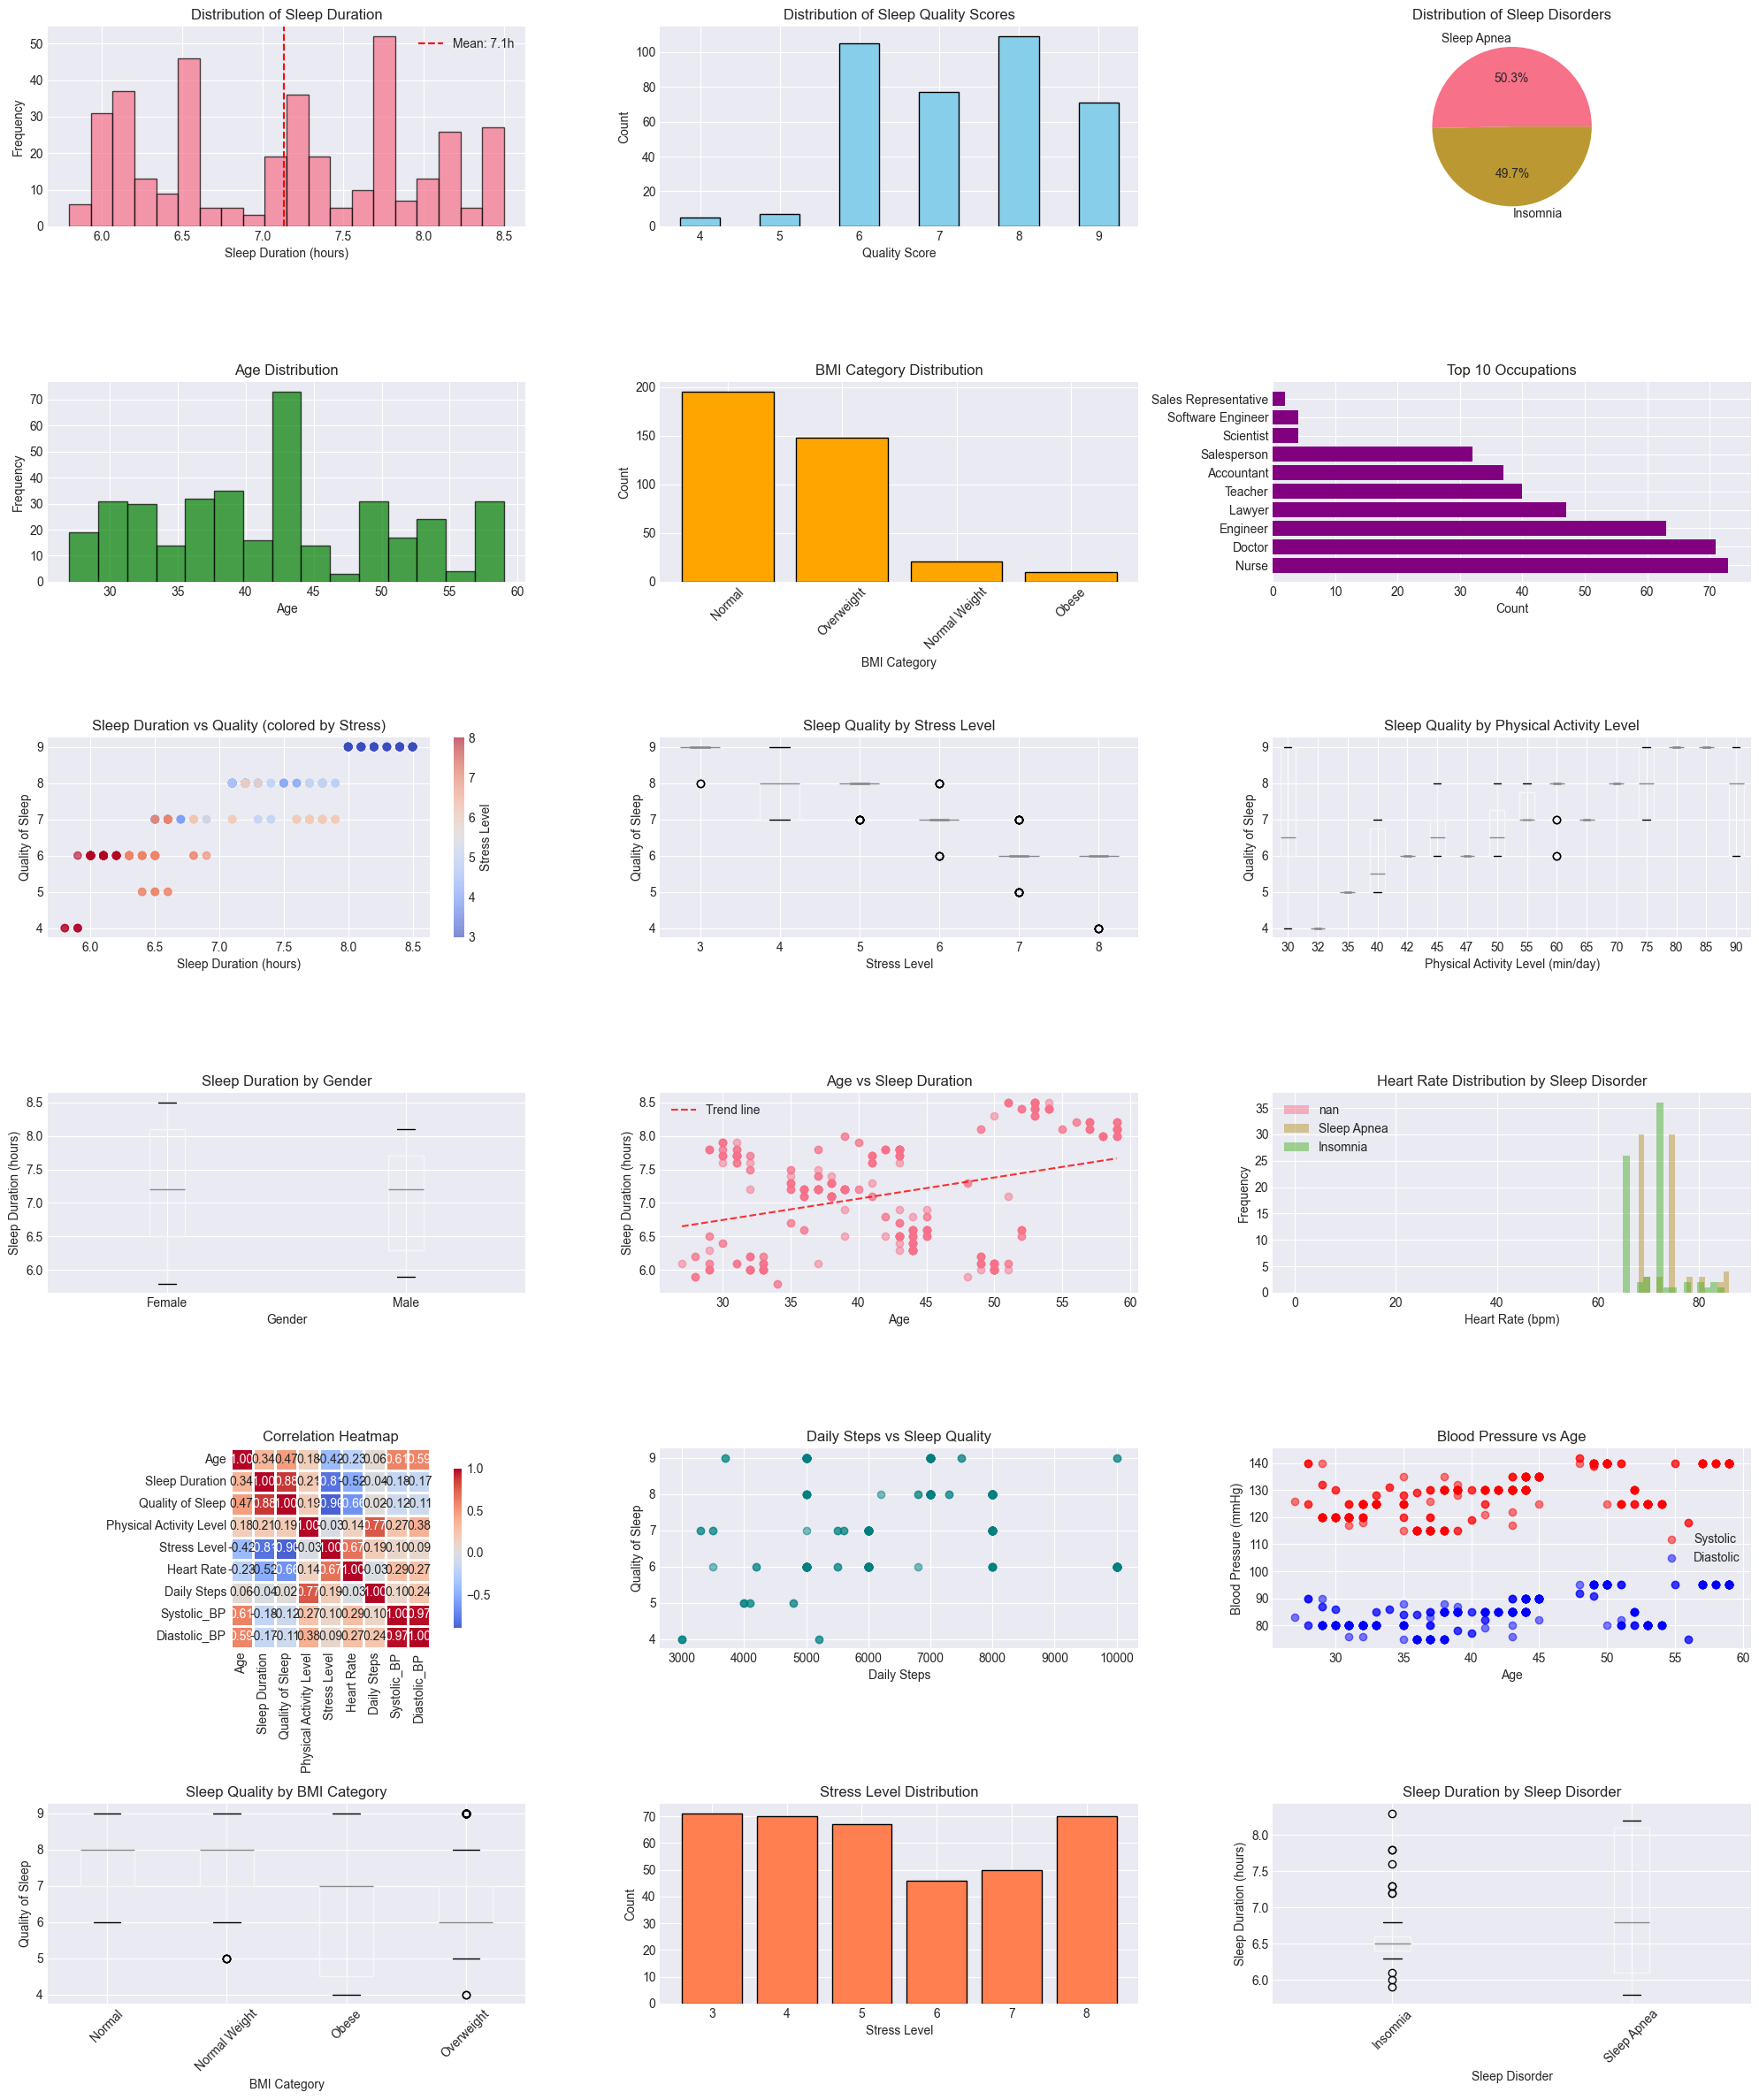


Visualizations saved as 'sleep_health_comprehensive_analysis.png'


In [7]:
# ==========================================
# 6. VISUALIZATIONS
# ==========================================
print("\n" + "=" * 80)
print("6. CREATING VISUALIZATIONS")
print("=" * 80)

# Create figure with subplots
fig = plt.figure(figsize=(20, 24))

# 1. Sleep Duration Distribution
ax1 = plt.subplot(6, 3, 1)
df['Sleep Duration'].hist(bins=20, edgecolor='black', alpha=0.7)
plt.axvline(df['Sleep Duration'].mean(), color='red', linestyle='--', label=f'Mean: {df["Sleep Duration"].mean():.1f}h')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.legend()

# 2. Sleep Quality Distribution
ax2 = plt.subplot(6, 3, 2)
df['Quality of Sleep'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

# 3. Sleep Disorders Distribution
ax3 = plt.subplot(6, 3, 3)
sleep_disorder_counts = df['Sleep Disorder'].value_counts()
plt.pie(sleep_disorder_counts.values, labels=sleep_disorder_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sleep Disorders')

# 4. Age Distribution
ax4 = plt.subplot(6, 3, 4)
df['Age'].hist(bins=15, edgecolor='black', alpha=0.7, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 5. BMI Category Distribution
ax5 = plt.subplot(6, 3, 5)
bmi_counts = df['BMI Category'].value_counts()
plt.bar(bmi_counts.index, bmi_counts.values, color='orange', edgecolor='black')
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 6. Occupation Distribution (Top 10)
ax6 = plt.subplot(6, 3, 6)
top_occupations = df['Occupation'].value_counts().head(10)
plt.barh(range(len(top_occupations)), top_occupations.values, color='purple')
plt.yticks(range(len(top_occupations)), top_occupations.index)
plt.title('Top 10 Occupations')
plt.xlabel('Count')

# 7. Sleep Duration vs Quality Scatter
ax7 = plt.subplot(6, 3, 7)
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'], alpha=0.6, c=df['Stress Level'], cmap='coolwarm')
plt.colorbar(label='Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration vs Quality (colored by Stress)')

# 8. Stress Level vs Sleep Quality Boxplot
ax8 = plt.subplot(6, 3, 8)
df.boxplot(column='Quality of Sleep', by='Stress Level', ax=ax8)
plt.title('Sleep Quality by Stress Level')
plt.suptitle('')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

# 9. Physical Activity vs Sleep Quality
ax9 = plt.subplot(6, 3, 9)
df.boxplot(column='Quality of Sleep', by='Physical Activity Level', ax=ax9)
plt.title('Sleep Quality by Physical Activity Level')
plt.suptitle('')
plt.xlabel('Physical Activity Level (min/day)')
plt.ylabel('Quality of Sleep')

# 10. Gender comparison for Sleep Duration
ax10 = plt.subplot(6, 3, 10)
df.boxplot(column='Sleep Duration', by='Gender', ax=ax10)
plt.title('Sleep Duration by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')

# 11. Age vs Sleep Duration
ax11 = plt.subplot(6, 3, 11)
plt.scatter(df['Age'], df['Sleep Duration'], alpha=0.5)
z = np.polyfit(df['Age'], df['Sleep Duration'], 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), "r--", alpha=0.8, label='Trend line')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.title('Age vs Sleep Duration')
plt.legend()

# 12. Heart Rate Distribution by Sleep Disorder
ax12 = plt.subplot(6, 3, 12)
for disorder in df['Sleep Disorder'].unique():
    subset = df[df['Sleep Disorder'] == disorder]
    plt.hist(subset['Heart Rate'], alpha=0.5, label=disorder, bins=15)
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution by Sleep Disorder')
plt.legend()

# 13. Correlation Heatmap
ax13 = plt.subplot(6, 3, 13)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')

# 14. Daily Steps vs Sleep Quality
ax14 = plt.subplot(6, 3, 14)
plt.scatter(df['Daily Steps'], df['Quality of Sleep'], alpha=0.5, c='teal')
plt.xlabel('Daily Steps')
plt.ylabel('Quality of Sleep')
plt.title('Daily Steps vs Sleep Quality')

# 15. Blood Pressure vs Age
ax15 = plt.subplot(6, 3, 15)
plt.scatter(df['Age'], df['Systolic_BP'], alpha=0.5, label='Systolic', c='red')
plt.scatter(df['Age'], df['Diastolic_BP'], alpha=0.5, label='Diastolic', c='blue')
plt.xlabel('Age')
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Blood Pressure vs Age')
plt.legend()

# 16. Sleep Quality by BMI Category
ax16 = plt.subplot(6, 3, 16)
df.boxplot(column='Quality of Sleep', by='BMI Category', ax=ax16)
plt.title('Sleep Quality by BMI Category')
plt.suptitle('')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)

# 17. Stress Level Distribution
ax17 = plt.subplot(6, 3, 17)
stress_counts = df['Stress Level'].value_counts().sort_index()
plt.bar(stress_counts.index, stress_counts.values, color='coral', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Stress Level Distribution')

# 18. Sleep Duration by Sleep Disorder
ax18 = plt.subplot(6, 3, 18)
df.boxplot(column='Sleep Duration', by='Sleep Disorder', ax=ax18)
plt.title('Sleep Duration by Sleep Disorder')
plt.suptitle('')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('sleep_health_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualizations saved as 'sleep_health_comprehensive_analysis.png'")

## 7. GROUP COMPARISONS & STATISTICAL TESTS

In [8]:
# ==========================================
# 7. GROUP COMPARISONS & STATISTICAL TESTS
# ==========================================
print("\n" + "=" * 80)
print("7. GROUP COMPARISONS & STATISTICAL TESTS")
print("=" * 80)

# Gender differences in sleep quality
print("\n### Gender Differences in Sleep Quality ###")
male_sleep = df[df['Gender'] == 'Male']['Quality of Sleep']
female_sleep = df[df['Gender'] == 'Female']['Quality of Sleep']
t_stat, p_value = stats.ttest_ind(male_sleep, female_sleep)
print(f"Male avg sleep quality: {male_sleep.mean():.2f}")
print(f"Female avg sleep quality: {female_sleep.mean():.2f}")
print(f"T-test results: t={t_stat:.3f}, p={p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# ANOVA for Sleep Quality across BMI Categories
print("\n### Sleep Quality across BMI Categories (ANOVA) ###")
bmi_groups = [group['Quality of Sleep'].values for name, group in df.groupby('BMI Category')]
f_stat, p_value = f_oneway(*bmi_groups)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Chi-square test for Sleep Disorder and BMI Category
print("\n### Association between Sleep Disorder and BMI Category ###")
contingency_table = pd.crosstab(df['Sleep Disorder'], df['BMI Category'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}, p-value: {p_value:.4f}")
print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'}")


7. GROUP COMPARISONS & STATISTICAL TESTS

### Gender Differences in Sleep Quality ###
Male avg sleep quality: 6.97
Female avg sleep quality: 7.66
T-test results: t=-5.875, p=0.0000
Significant difference: Yes

### Sleep Quality across BMI Categories (ANOVA) ###
F-statistic: 14.933, p-value: 0.0000
Significant difference: Yes

### Association between Sleep Disorder and BMI Category ###
Chi-square statistic: 0.735, p-value: 0.8650
Significant association: No


## 8. INSIGHTS BY OCCUPATION

In [9]:
# ==========================================
# 8. INSIGHTS BY OCCUPATION
# ==========================================
print("\n" + "=" * 80)
print("8. INSIGHTS BY OCCUPATION")
print("=" * 80)

# Top 5 most stressed occupations
print("\n### Top 5 Most Stressed Occupations ###")
stress_by_occupation = df.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False).head(5)
for idx, (occupation, stress) in enumerate(stress_by_occupation.items(), 1):
    print(f"{idx}. {occupation}: {stress:.2f}")

# Top 5 best sleeping occupations
print("\n### Top 5 Best Sleeping Occupations ###")
sleep_by_occupation = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False).head(5)
for idx, (occupation, quality) in enumerate(sleep_by_occupation.items(), 1):
    print(f"{idx}. {occupation}: {quality:.2f}")


8. INSIGHTS BY OCCUPATION

### Top 5 Most Stressed Occupations ###
1. Sales Representative: 8.00
2. Salesperson: 7.00
3. Scientist: 7.00
4. Doctor: 6.73
5. Software Engineer: 6.00

### Top 5 Best Sleeping Occupations ###
1. Engineer: 8.41
2. Lawyer: 7.89
3. Accountant: 7.89
4. Nurse: 7.37
5. Manager: 7.00


## 9. AGE GROUP ANALYSIS

In [10]:
# ==========================================
# 9. AGE GROUP ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("9. AGE GROUP ANALYSIS")
print("=" * 80)

# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], 
                         labels=['<30', '30-40', '40-50', '50+'])

print("\n### Sleep Patterns by Age Group ###")
age_group_stats = df.groupby('Age_Group').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Physical Activity Level': 'mean',
    'Has_Sleep_Disorder': 'mean'
}).round(2)
print(age_group_stats)


9. AGE GROUP ANALYSIS

### Sleep Patterns by Age Group ###
           Sleep Duration  Quality of Sleep  Stress Level  \
Age_Group                                                   
<30                  6.92              6.16          6.84   
30-40                7.03              7.30          5.46   
40-50                6.78              6.81          5.99   
50+                  8.02              8.70          3.58   

           Physical Activity Level  Has_Sleep_Disorder  
Age_Group                                               
<30                          54.59                0.28  
30-40                        55.31                0.10  
40-50                        66.52                0.70  
50+                          55.00                0.53  


## 10. PREDICTIVE INSIGHTS

In [11]:
# ==========================================
# 10. PREDICTIVE INSIGHTS
# ==========================================
print("\n" + "=" * 80)
print("10. PREDICTIVE INSIGHTS & RISK FACTORS")
print("=" * 80)

# Identify risk factors for sleep disorders
print("\n### Risk Factors for Sleep Disorders ###")
disorder_comparison = df.groupby('Has_Sleep_Disorder').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Physical Activity Level': 'mean',
    'Heart Rate': 'mean',
    'Systolic_BP': 'mean'
}).round(2)
print("\nComparison: No Disorder (0) vs Has Disorder (1)")
print(disorder_comparison)

# Calculate percentage differences
print("\n### Percentage Differences ###")
no_disorder = disorder_comparison.loc[0]
has_disorder = disorder_comparison.loc[1]
pct_diff = ((has_disorder - no_disorder) / no_disorder * 100).round(1)
for metric, diff in pct_diff.items():
    print(f"{metric}: {diff:+.1f}%")


10. PREDICTIVE INSIGHTS & RISK FACTORS

### Risk Factors for Sleep Disorders ###

Comparison: No Disorder (0) vs Has Disorder (1)
                    Sleep Duration  Quality of Sleep  Stress Level  \
Has_Sleep_Disorder                                                   
0                             7.36              7.63          5.11   
1                             6.81              6.87          5.77   

                    Physical Activity Level  Heart Rate  Systolic_BP  
Has_Sleep_Disorder                                                    
0                                     57.95       69.02       124.05  
1                                     60.90       71.79       134.92  

### Percentage Differences ###
Sleep Duration: -7.5%
Quality of Sleep: -10.0%
Stress Level: +12.9%
Physical Activity Level: +5.1%
Heart Rate: +4.0%
Systolic_BP: +8.8%


## 11. KEY FINDINGS SUMMARY

In [12]:
# ==========================================
# 11. KEY FINDINGS SUMMARY
# ==========================================
print("\n" + "=" * 80)
print("11. KEY FINDINGS SUMMARY")
print("=" * 80)

print("\n### MAIN INSIGHTS ###")
print("\n1. SLEEP DURATION:")
print(f"   - Average: {df['Sleep Duration'].mean():.2f} hours")
print(f"   - {(df['Sleep Duration'] < 7).sum()} people ({(df['Sleep Duration'] < 7).mean()*100:.1f}%) get less than 7 hours")
print(f"   - {(df['Sleep Duration'] > 9).sum()} people ({(df['Sleep Duration'] > 9).mean()*100:.1f}%) get more than 9 hours")

print("\n2. SLEEP DISORDERS:")
disorder_pct = df['Sleep Disorder'].value_counts(normalize=True) * 100
for disorder, pct in disorder_pct.items():
    print(f"   - {disorder}: {pct:.1f}%")

print("\n3. STRESS IMPACT:")
high_stress = df[df['Stress Level'] >= 7]
low_stress = df[df['Stress Level'] <= 3]
print(f"   - High stress (≥7) avg sleep quality: {high_stress['Quality of Sleep'].mean():.2f}")
print(f"   - Low stress (≤3) avg sleep quality: {low_stress['Quality of Sleep'].mean():.2f}")
print(f"   - Difference: {low_stress['Quality of Sleep'].mean() - high_stress['Quality of Sleep'].mean():.2f} points")

print("\n4. PHYSICAL ACTIVITY BENEFIT:")
active = df[df['Physical Activity Level'] >= 60]
sedentary = df[df['Physical Activity Level'] <= 30]
print(f"   - Active (≥60 min/day) avg sleep quality: {active['Quality of Sleep'].mean():.2f}")
print(f"   - Sedentary (≤30 min/day) avg sleep quality: {sedentary['Quality of Sleep'].mean():.2f}")
print(f"   - Improvement with activity: {active['Quality of Sleep'].mean() - sedentary['Quality of Sleep'].mean():.2f} points")

print("\n5. AGE TRENDS:")
correlation_age_sleep = df['Age'].corr(df['Sleep Duration'])
correlation_age_quality = df['Age'].corr(df['Quality of Sleep'])
print(f"   - Correlation between Age and Sleep Duration: {correlation_age_sleep:.3f}")
print(f"   - Correlation between Age and Sleep Quality: {correlation_age_quality:.3f}")

print("\n6. OPTIMAL PROFILE FOR GOOD SLEEP:")
good_sleepers = df[df['Quality of Sleep'] >= 8]
print(f"   - Average sleep duration: {good_sleepers['Sleep Duration'].mean():.2f} hours")
print(f"   - Average stress level: {good_sleepers['Stress Level'].mean():.2f}")
print(f"   - Average physical activity: {good_sleepers['Physical Activity Level'].mean():.1f} min/day")
print(f"   - Average daily steps: {good_sleepers['Daily Steps'].mean():.0f}")

print("\n7. WARNING SIGNS (Associated with poor sleep quality):")
poor_sleepers = df[df['Quality of Sleep'] <= 5]
print(f"   - Average stress level: {poor_sleepers['Stress Level'].mean():.2f}")
print(f"   - Average heart rate: {poor_sleepers['Heart Rate'].mean():.1f} bpm")
print(f"   - Average systolic BP: {poor_sleepers['Systolic_BP'].mean():.1f} mmHg")
print(f"   - Sleep disorder prevalence: {poor_sleepers['Has_Sleep_Disorder'].mean()*100:.1f}%")



11. KEY FINDINGS SUMMARY

### MAIN INSIGHTS ###

1. SLEEP DURATION:
   - Average: 7.13 hours
   - 155 people (41.4%) get less than 7 hours
   - 0 people (0.0%) get more than 9 hours

2. SLEEP DISORDERS:
   - Sleep Apnea: 50.3%
   - Insomnia: 49.7%

3. STRESS IMPACT:
   - High stress (≥7) avg sleep quality: 5.92
   - Low stress (≤3) avg sleep quality: 8.97
   - Difference: 3.06 points

4. PHYSICAL ACTIVITY BENEFIT:
   - Active (≥60 min/day) avg sleep quality: 7.69
   - Sedentary (≤30 min/day) avg sleep quality: 7.35
   - Improvement with activity: 0.34 points

5. AGE TRENDS:
   - Correlation between Age and Sleep Duration: 0.345
   - Correlation between Age and Sleep Quality: 0.474

6. OPTIMAL PROFILE FOR GOOD SLEEP:
   - Average sleep duration: 7.73 hours
   - Average stress level: 3.98
   - Average physical activity: 63.8 min/day
   - Average daily steps: 6904

7. WARNING SIGNS (Associated with poor sleep quality):
   - Average stress level: 7.42
   - Average heart rate: 80.1 bpm
   

## 12. RECOMMENDATIONS

In [13]:
# ==========================================
# 12. RECOMMENDATIONS
# ==========================================
print("\n" + "=" * 80)
print("12. DATA-DRIVEN RECOMMENDATIONS")
print("=" * 80)

print("\nBased on the analysis, here are evidence-based recommendations:")
print("\n1. TARGET SLEEP DURATION: Aim for 7-9 hours (optimal range in dataset)")
print("\n2. STRESS MANAGEMENT: Critical factor - each point reduction in stress")
print("   correlates with improved sleep quality")
print("\n3. PHYSICAL ACTIVITY: Minimum 30-60 minutes daily shows significant benefits")
print("\n4. DAILY STEPS: Target 5000+ steps for better sleep outcomes")
print("\n5. MONITOR HEALTH METRICS: Watch for elevated heart rate and blood pressure")
print("\n6. OCCUPATION AWARENESS: Some professions show higher stress/lower sleep quality")
print("\n7. AGE CONSIDERATIONS: Sleep patterns change with age - adjust expectations")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)

# Save summary statistics to CSV
summary_df = pd.DataFrame({
    'Metric': ['Total Records', 'Avg Sleep Duration', 'Avg Sleep Quality', 
               'Avg Stress Level', 'Sleep Disorder Rate', 'Avg Physical Activity'],
    'Value': [len(df), df['Sleep Duration'].mean(), df['Quality of Sleep'].mean(),
              df['Stress Level'].mean(), df['Has_Sleep_Disorder'].mean()*100,
              df['Physical Activity Level'].mean()]
})
summary_df.to_csv('sleep_health_summary.csv', index=False)
print("\nSummary statistics saved to 'sleep_health_summary.csv'")

# Save detailed insights
insights_text = f"""
SLEEP HEALTH DATASET - KEY INSIGHTS REPORT
==========================================
Dataset Size: {len(df)} records

TOP FINDINGS:
1. Sleep Duration: {df['Sleep Duration'].mean():.2f} +/- {df['Sleep Duration'].std():.2f} hours
2. Sleep Quality: {df['Quality of Sleep'].mean():.2f} +/- {df['Quality of Sleep'].std():.2f} (scale 1-10)
3. Most Common Sleep Disorder: {df[df['Sleep Disorder'] != 'None']['Sleep Disorder'].mode().values[0] if len(df[df['Sleep Disorder'] != 'None']) > 0 else 'None'}
4. Strongest Predictor of Sleep Quality: {'Stress Level' if abs(df['Stress Level'].corr(df['Quality of Sleep'])) > 0.5 else 'Multiple factors'}
5. Gender with Better Sleep: {'Female' if female_sleep.mean() > male_sleep.mean() else 'Male'}

RISK FACTORS IDENTIFIED:
- High stress (>=7): Associated with {high_stress['Quality of Sleep'].mean():.1f} sleep quality
- Low physical activity (<30 min): Associated with {sedentary['Quality of Sleep'].mean():.1f} sleep quality
- Sleep disorders present in {df['Has_Sleep_Disorder'].mean()*100:.1f}% of population

RECOMMENDATIONS:
- Optimal sleep duration: 7-9 hours
- Stress management is crucial
- Regular physical activity (>60 min/day) improves sleep quality
- Monitor cardiovascular health indicators
"""

with open('sleep_health_insights.txt', 'w', encoding='utf-8') as f:
    f.write(insights_text)
print("Detailed insights saved to 'sleep_health_insights.txt'")

print("\n" + "=" * 80)
print("All analyses complete! Check the generated files:")
print("1. sleep_health_comprehensive_analysis.png - All visualizations")
print("2. sleep_health_summary.csv - Summary statistics")
print("3. sleep_health_insights.txt - Key insights report")
print("=" * 80)


12. DATA-DRIVEN RECOMMENDATIONS

Based on the analysis, here are evidence-based recommendations:

1. TARGET SLEEP DURATION: Aim for 7-9 hours (optimal range in dataset)

2. STRESS MANAGEMENT: Critical factor - each point reduction in stress
   correlates with improved sleep quality

3. PHYSICAL ACTIVITY: Minimum 30-60 minutes daily shows significant benefits

4. DAILY STEPS: Target 5000+ steps for better sleep outcomes

5. MONITOR HEALTH METRICS: Watch for elevated heart rate and blood pressure

6. OCCUPATION AWARENESS: Some professions show higher stress/lower sleep quality

7. AGE CONSIDERATIONS: Sleep patterns change with age - adjust expectations

ANALYSIS COMPLETE!

Summary statistics saved to 'sleep_health_summary.csv'
Detailed insights saved to 'sleep_health_insights.txt'

All analyses complete! Check the generated files:
1. sleep_health_comprehensive_analysis.png - All visualizations
2. sleep_health_summary.csv - Summary statistics
3. sleep_health_insights.txt - Key insights r

## Extended Sleep Health Analysis - Additional Advanced Techniques

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import shapiro, anderson, kstest, jarque_bera
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score, mean_absolute_error, silhouette_score
from scipy.stats import ttest_ind

## 13. ADVANCED STATISTICAL TESTING

In [15]:
# ==========================================
# 13. ADVANCED STATISTICAL TESTING
# ==========================================
print("\n" + "=" * 80)
print("13. ADVANCED STATISTICAL TESTING")
print("=" * 80)

# Normality tests for key variables
print("\n### Comprehensive Normality Testing ###")
normality_vars = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate', 'Daily Steps']
normality_results = []

for var in normality_vars:
    if var in df.columns:
        data = df[var].dropna()
        
        # Shapiro-Wilk test (best for small samples)
        shapiro_stat, shapiro_p = shapiro(data) if len(data) <= 5000 else (np.nan, np.nan)
        
        # Anderson-Darling test
        anderson_result = anderson(data, dist='norm')
        anderson_stat = anderson_result.statistic
        
        # Kolmogorov-Smirnov test
        ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
        
        # Jarque-Bera test
        jb_stat, jb_p = jarque_bera(data)
        
        normality_results.append({
            'Variable': var,
            'Shapiro-Wilk p': shapiro_p,
            'Anderson-Darling stat': anderson_stat,
            'K-S p': ks_p,
            'Jarque-Bera p': jb_p,
            'Is Normal (p>0.05)': 'Yes' if (shapiro_p > 0.05 if not np.isnan(shapiro_p) else ks_p > 0.05) else 'No'
        })

normality_df = pd.DataFrame(normality_results)
print(normality_df.to_string())

# Save normality test results
normality_df.to_csv('normality_tests_comprehensive.csv', index=False)


13. ADVANCED STATISTICAL TESTING

### Comprehensive Normality Testing ###
           Variable  Shapiro-Wilk p  Anderson-Darling stat         K-S p  Jarque-Bera p Is Normal (p>0.05)
0    Sleep Duration    1.267828e-11               7.304044  8.666442e-06   2.456354e-06                 No
1  Quality of Sleep    1.881529e-15              15.553714  2.282373e-13   3.139113e-03                 No
2      Stress Level    1.112609e-15              12.640984  8.956641e-09   5.416835e-07                 No
3        Heart Rate    2.684952e-16              11.012488  7.176558e-09   7.549098e-38                 No
4       Daily Steps    1.653180e-11               8.906952  1.688477e-06   1.044255e-01                 No


## 14. OUTLIER DETECTION & ANALYSIS


14. OUTLIER DETECTION & ANALYSIS

### Multi-Method Outlier Detection ###

Outlier Detection Summary:
                  IQR_outliers  Z_score_outliers  Modified_Z_outliers  \
Sleep Duration             0.0               0.0                  0.0   
Quality of Sleep           0.0               0.0                  0.0   
Stress Level               0.0               0.0                  0.0   
Heart Rate                15.0               9.0                 12.0   
Daily Steps                0.0               0.0                  0.0   

                  Lower_fence  Upper_fence  
Sleep Duration            4.3          9.9  
Quality of Sleep          3.0         11.0  
Stress Level             -0.5         11.5  
Heart Rate               62.0         78.0  
Daily Steps            2000.0      11600.0  


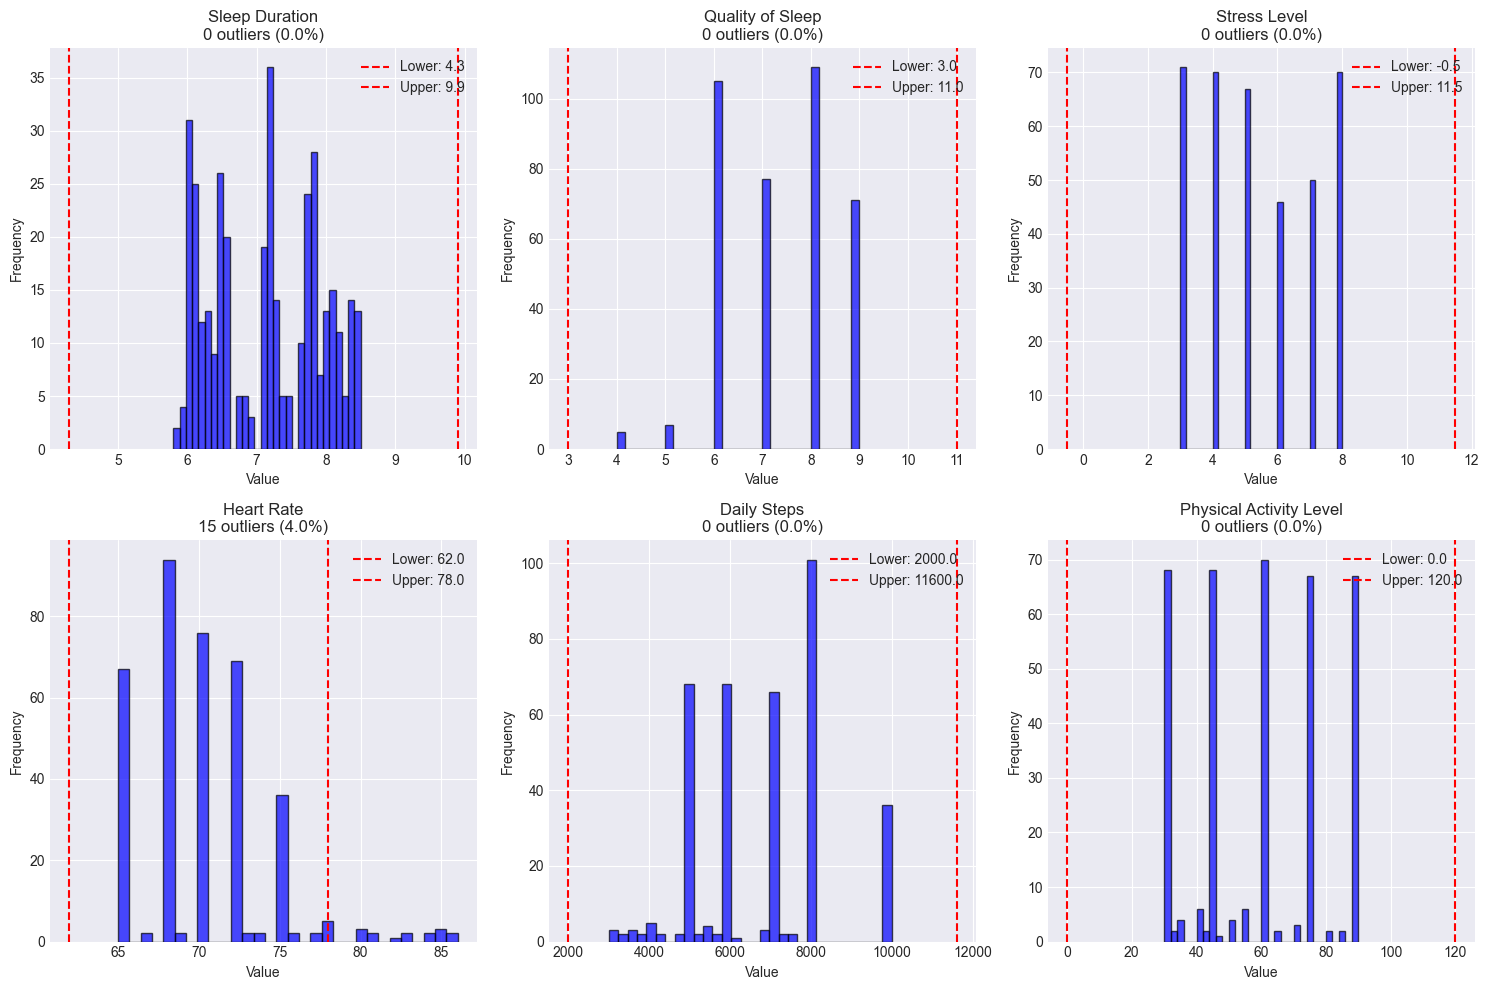

In [16]:
# ==========================================
# 14. OUTLIER DETECTION & ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("14. OUTLIER DETECTION & ANALYSIS")
print("=" * 80)

# Multiple outlier detection methods
print("\n### Multi-Method Outlier Detection ###")

outlier_summary = {}
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    if col in ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate', 'Daily Steps']:
        data = df[col].dropna()
        
        # Method 1: IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        iqr_outliers = ((data < lower_fence) | (data > upper_fence)).sum()
        
        # Method 2: Z-score (|z| > 3)
        z_scores = np.abs((data - data.mean()) / data.std())
        z_outliers = (z_scores > 3).sum()
        
        # Method 3: Modified Z-score using MAD
        median = data.median()
        mad = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / (mad if mad != 0 else 1)
        modified_z_outliers = (np.abs(modified_z_scores) > 3.5).sum()
        
        outlier_summary[col] = {
            'IQR_outliers': int(iqr_outliers),
            'Z_score_outliers': int(z_outliers),
            'Modified_Z_outliers': int(modified_z_outliers),
            'Lower_fence': lower_fence,
            'Upper_fence': upper_fence
        }

outlier_df = pd.DataFrame(outlier_summary).T
print("\nOutlier Detection Summary:")
print(outlier_df)
outlier_df.to_csv('outlier_detection_summary.csv')

# Visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(['Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                          'Heart Rate', 'Daily Steps', 'Physical Activity Level']):
    if col in df.columns and idx < 6:
        data = df[col].dropna()
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - 1.5 * IQR
        upper_fence = Q3 + 1.5 * IQR
        
        outliers = data[(data < lower_fence) | (data > upper_fence)]
        
        axes[idx].hist(data, bins=30, alpha=0.7, color='blue', edgecolor='black')
        axes[idx].axvline(lower_fence, color='red', linestyle='--', label=f'Lower: {lower_fence:.1f}')
        axes[idx].axvline(upper_fence, color='red', linestyle='--', label=f'Upper: {upper_fence:.1f}')
        axes[idx].set_title(f'{col}\n{len(outliers)} outliers ({len(outliers)/len(data)*100:.1f}%)')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()

plt.tight_layout()
plt.savefig('outlier_analysis_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

## 15. CLUSTERING ANALYSIS


15. CLUSTERING ANALYSIS

### K-Means Clustering ###
K=2: Inertia=1279.19, Silhouette=0.445
K=3: Inertia=928.70, Silhouette=0.507
K=4: Inertia=663.80, Silhouette=0.512
K=5: Inertia=519.97, Silhouette=0.505
K=6: Inertia=415.98, Silhouette=0.517
K=7: Inertia=317.71, Silhouette=0.582

### Cluster Profiles (K=3) ###
        Sleep Duration       Quality of Sleep       Stress Level        \
                  mean   std             mean   std         mean   std   
Cluster                                                                  
0                 7.61  0.55             8.05  0.74         4.27  1.06   
1                 6.07  0.08             6.00  0.00         8.00  0.00   
2                 6.37  0.35             6.01  0.67         7.14  0.84   

        Physical Activity Level        Heart Rate       Daily Steps           
                           mean    std       mean   std        mean      std  
Cluster                                                                       
0   

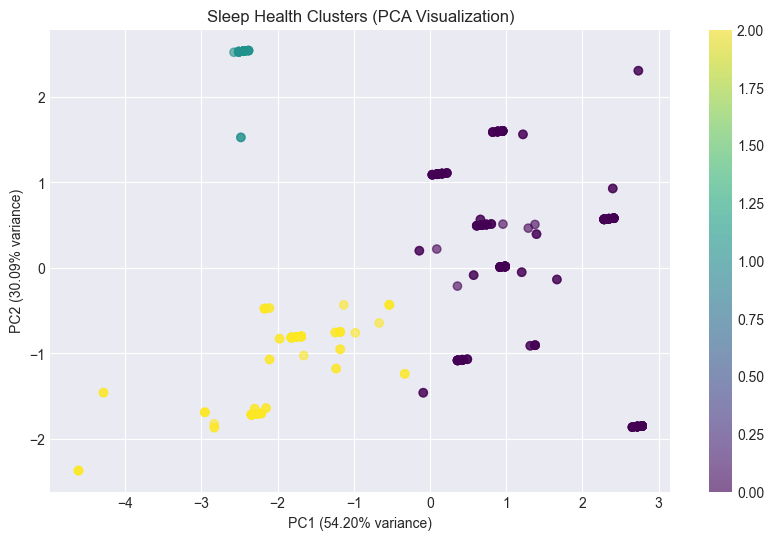


PCA explained variance: 84.29%


In [17]:
# ==========================================
# 15. CLUSTERING ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("15. CLUSTERING ANALYSIS")
print("=" * 80)

# Prepare data for clustering
clustering_features = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                       'Physical Activity Level', 'Heart Rate', 'Daily Steps']
cluster_data = df[clustering_features].dropna()

# Standardize features
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# K-Means clustering
print("\n### K-Means Clustering ###")
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
    
    score = silhouette_score(cluster_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={score:.3f}")

# Optimal number of clusters (using elbow method)
optimal_k = 3  # You can adjust based on elbow plot

# Final clustering with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_scaled)

# Add cluster labels to original dataframe
cluster_data['Cluster'] = cluster_labels

# Analyze clusters
print(f"\n### Cluster Profiles (K={optimal_k}) ###")
cluster_profiles = cluster_data.groupby('Cluster').agg({
    'Sleep Duration': ['mean', 'std'],
    'Quality of Sleep': ['mean', 'std'],
    'Stress Level': ['mean', 'std'],
    'Physical Activity Level': ['mean', 'std'],
    'Heart Rate': ['mean', 'std'],
    'Daily Steps': ['mean', 'std']
}).round(2)
print(cluster_profiles)

# Save cluster analysis
cluster_profiles.to_csv('cluster_profiles.csv')

# Visualize clusters (PCA for 2D visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(cluster_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], 
                     c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Sleep Health Clusters (PCA Visualization)')
plt.savefig('clustering_pca_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPCA explained variance: {pca.explained_variance_ratio_.sum():.2%}")

## 16. TIME-BASED PATTERN ANALYSIS

In [18]:
# ==========================================
# 16. TIME-BASED PATTERN ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("16. TIME-BASED PATTERN ANALYSIS")
print("=" * 80)

# Analyze patterns by age cohorts
print("\n### Generational Sleep Patterns ###")
df['Generation'] = pd.cut(df['Age'], 
                          bins=[0, 25, 40, 55, 100],
                          labels=['Gen Z/Young', 'Millennials', 'Gen X', 'Boomers+'])

generation_analysis = df.groupby('Generation').agg({
    'Sleep Duration': ['mean', 'std', 'count'],
    'Quality of Sleep': ['mean', 'std'],
    'Stress Level': ['mean', 'std'],
    'Physical Activity Level': ['mean', 'std'],
    'Has_Sleep_Disorder': 'mean'
}).round(2)

print(generation_analysis)
generation_analysis.to_csv('generation_sleep_patterns.csv')

# Statistical tests between generations
from scipy.stats import f_oneway
generations = df['Generation'].dropna().unique()
sleep_by_gen = [df[df['Generation'] == gen]['Sleep Duration'].dropna() for gen in generations]
f_stat, p_value = f_oneway(*sleep_by_gen)
print(f"\nANOVA for sleep duration across generations: F={f_stat:.3f}, p={p_value:.4f}")


16. TIME-BASED PATTERN ANALYSIS

### Generational Sleep Patterns ###
            Sleep Duration             Quality of Sleep       Stress Level  \
                      mean   std count             mean   std         mean   
Generation                                                                   
Gen Z/Young            NaN   NaN     0              NaN   NaN          NaN   
Millennials           7.01  0.65   165             7.08  1.09         5.73   
Gen X                 7.07  0.87   176             7.22  1.16         5.51   
Boomers+              8.10  0.08    33             9.00  0.00         3.00   

                  Physical Activity Level        Has_Sleep_Disorder  
              std                    mean    std               mean  
Generation                                                           
Gen Z/Young   NaN                     NaN    NaN                NaN  
Millennials  1.53                   55.17  16.56               0.13  
Gen X        1.82                

## 17. INTERACTION EFFECTS ANALYSIS


17. INTERACTION EFFECTS ANALYSIS

### Stress × Physical Activity Interaction ###

Mean Sleep Quality by Stress × Activity:
Activity_Category   Low  Medium  High
Stress_Category                      
Low                9.00    8.00  9.00
Medium             7.00    7.61  7.57
High               5.82    5.93  6.00


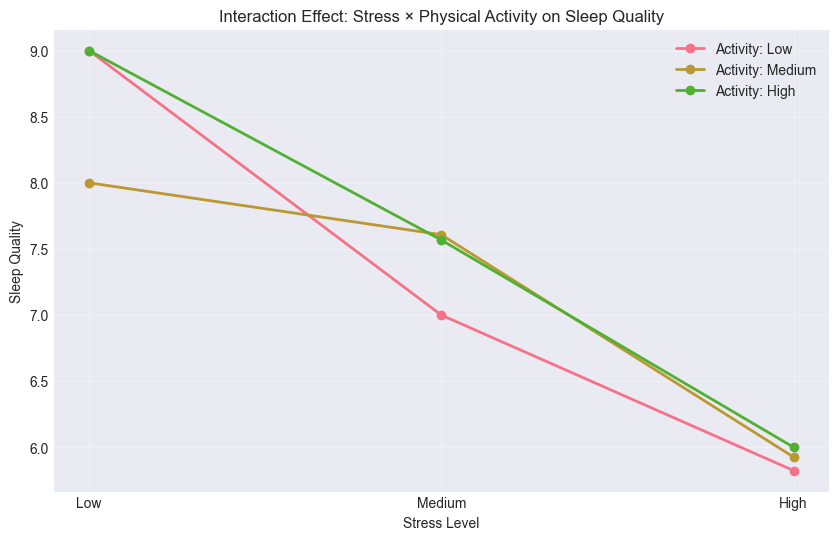

In [19]:
# ==========================================
# 17. INTERACTION EFFECTS ANALYSIS
# ==========================================
print("\n" + "=" * 80)
print("17. INTERACTION EFFECTS ANALYSIS")
print("=" * 80)

# Analyze interaction between stress and physical activity on sleep quality
print("\n### Stress × Physical Activity Interaction ###")

# Create categories for interaction analysis
df['Stress_Category'] = pd.cut(df['Stress Level'], 
                               bins=[0, 3, 6, 10],
                               labels=['Low', 'Medium', 'High'])
df['Activity_Category'] = pd.cut(df['Physical Activity Level'],
                                 bins=[0, 30, 60, 200],
                                 labels=['Low', 'Medium', 'High'])

# Interaction matrix
interaction_matrix = df.pivot_table(
    values='Quality of Sleep',
    index='Stress_Category',
    columns='Activity_Category',
    aggfunc='mean'
)

print("\nMean Sleep Quality by Stress × Activity:")
print(interaction_matrix.round(2))

# Visualize interaction
fig, ax = plt.subplots(figsize=(10, 6))
for activity in ['Low', 'Medium', 'High']:
    if activity in interaction_matrix.columns:
        data = interaction_matrix[activity]
        ax.plot(data.index, data.values, marker='o', label=f'Activity: {activity}', linewidth=2)

ax.set_xlabel('Stress Level')
ax.set_ylabel('Sleep Quality')
ax.set_title('Interaction Effect: Stress × Physical Activity on Sleep Quality')
ax.legend()
ax.grid(True, alpha=0.3)
plt.savefig('interaction_stress_activity.png', dpi=300, bbox_inches='tight')
plt.show()

## 18. SLEEP DISORDER RISK PROFILING

In [20]:
# ==========================================
# 18. SLEEP DISORDER RISK PROFILING
# ==========================================
print("\n" + "=" * 80)
print("18. SLEEP DISORDER RISK PROFILING")
print("=" * 80)

# Create risk profiles for each sleep disorder
disorders = df['Sleep Disorder'].unique()
disorders = [d for d in disorders if d != 'None' and pd.notna(d)]

risk_profiles = {}
for disorder in disorders:
    print(f"\n### Risk Profile: {disorder} ###")
    
    # Compare those with disorder vs without
    has_disorder = df[df['Sleep Disorder'] == disorder]
    no_disorder = df[df['Sleep Disorder'] == 'None']
    
    profile = {}
    for feature in ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                   'Physical Activity Level', 'Heart Rate', 'Daily Steps']:
        if feature in df.columns:
            disorder_mean = has_disorder[feature].mean()
            normal_mean = no_disorder[feature].mean()
            
            # Statistical test
            stat, p_value = ttest_ind(has_disorder[feature].dropna(), 
                                      no_disorder[feature].dropna())
            
            profile[feature] = {
                'Disorder_Mean': disorder_mean,
                'Normal_Mean': normal_mean,
                'Difference': disorder_mean - normal_mean,
                'Percent_Diff': ((disorder_mean - normal_mean) / normal_mean * 100) if normal_mean != 0 else 0,
                'p_value': p_value,
                'Significant': 'Yes' if p_value < 0.05 else 'No'
            }
    
    risk_profiles[disorder] = profile
    
    # Print summary
    print(f"\nKey differences for {disorder}:")
    for feat, vals in profile.items():
        if vals['Significant'] == 'Yes':
            print(f"  {feat}: {vals['Percent_Diff']:+.1f}% (p={vals['p_value']:.4f})")

# Save risk profiles
for disorder, profile in risk_profiles.items():
    profile_df = pd.DataFrame(profile).T
    profile_df.to_csv(f'risk_profile_{disorder.replace(" ", "_").lower()}.csv')


18. SLEEP DISORDER RISK PROFILING

### Risk Profile: Sleep Apnea ###

Key differences for Sleep Apnea:

### Risk Profile: Insomnia ###

Key differences for Insomnia:


## 19. PREDICTIVE FEATURE ENGINEERING

In [21]:
# ==========================================
# 19. PREDICTIVE FEATURE ENGINEERING
# ==========================================
print("\n" + "=" * 80)
print("19. PREDICTIVE FEATURE ENGINEERING")
print("=" * 80)

# Create advanced features for better prediction
print("\n### Creating Advanced Features ###")

# Sleep debt indicator
df['Sleep_Debt'] = (7 - df['Sleep Duration']).clip(lower=0)

# Stress-to-Activity ratio
df['Stress_Activity_Ratio'] = df['Stress Level'] / (df['Physical Activity Level'] + 1)

# Cardiovascular risk score (simple proxy)
df['CV_Risk_Score'] = (
    (df['Systolic_BP'] > 130).astype(int) +
    (df['Diastolic_BP'] > 80).astype(int) +
    (df['Heart Rate'] > 80).astype(int)
)

# Sleep quality efficiency
df['Sleep_Quality_Per_Hour'] = df['Quality of Sleep'] / df['Sleep Duration'].replace(0, np.nan)

# Activity intensity (steps per minute of activity)
df['Activity_Intensity'] = df['Daily Steps'] / (df['Physical Activity Level'] + 1)

# BMI risk category
bmi_risk_map = {'Normal': 0, 'Underweight': 1, 'Overweight': 1, 'Obese': 2}
df['BMI_Risk_Score'] = df['BMI Category'].map(bmi_risk_map)

# Composite wellness score
df['Wellness_Score'] = (
    (df['Quality of Sleep'] / 10) * 0.3 +
    (10 - df['Stress Level']) / 10 * 0.3 +
    (df['Physical Activity Level'] / 100) * 0.2 +
    (df['Daily Steps'] / 10000) * 0.2
).clip(0, 1) * 100

print("\nNew features created:")
new_features = ['Sleep_Debt', 'Stress_Activity_Ratio', 'CV_Risk_Score', 
                'Sleep_Quality_Per_Hour', 'Activity_Intensity', 'BMI_Risk_Score', 
                'Wellness_Score']

for feat in new_features:
    if feat in df.columns:
        print(f"  {feat}: Mean={df[feat].mean():.2f}, Std={df[feat].std():.2f}")


19. PREDICTIVE FEATURE ENGINEERING

### Creating Advanced Features ###

New features created:
  Sleep_Debt: Mean=0.29, Std=0.39
  Stress_Activity_Ratio: Mean=0.10, Std=0.06
  CV_Risk_Score: Mean=0.91, Std=0.89
  Sleep_Quality_Per_Hour: Mean=1.02, Std=0.09
  Activity_Intensity: Mean=121.27, Std=31.60
  BMI_Risk_Score: Mean=0.48, Std=0.55
  Wellness_Score: Mean=61.25, Std=11.20


## 20. ADVANCED MACHINE LEARNING MODELS


20. ADVANCED MACHINE LEARNING MODELS

### Checking Sleep Disorder Data ###
Unique values in Sleep Disorder: [nan 'Sleep Apnea' 'Insomnia']
Value counts:
Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

Binary target distribution: {0: 219, 1: 155}

### Binary Classification: Gradient Boosting ###
Training set class distribution: {0: 164, 1: 116}
Test set class distribution: {0: 55, 1: 39}

Gradient Boosting Performance:
Accuracy: 0.957
ROC-AUC: 0.959

Top 10 Most Important Features:
                  feature  importance
7             Systolic_BP    0.548488
12         Wellness_Score    0.193318
10  Stress_Activity_Ratio    0.051773
2        Quality of Sleep    0.040925
0                     Age    0.038513
3            Stress Level    0.032366
1          Sleep Duration    0.031979
6             Daily Steps    0.027429
8            Diastolic_BP    0.026126
9              Sleep_Debt    0.006868


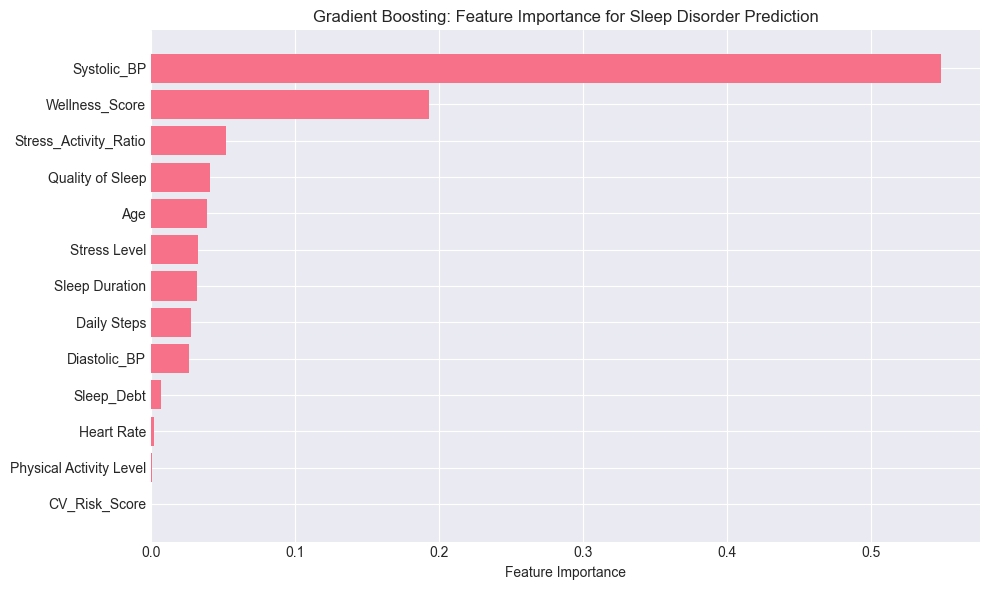


### Random Forest Regressor for Sleep Quality ###

Random Forest Regressor Performance:
R² Score: 0.993
MAE: 0.03
RMSE: 0.10

Top Features for Sleep Quality Prediction:
                   feature  importance
1           Sleep Duration    0.726670
2             Stress Level    0.191906
4               Heart Rate    0.030463
0                      Age    0.026086
5              Daily Steps    0.011725
7             Diastolic_BP    0.006700
6              Systolic_BP    0.004796
3  Physical Activity Level    0.001654


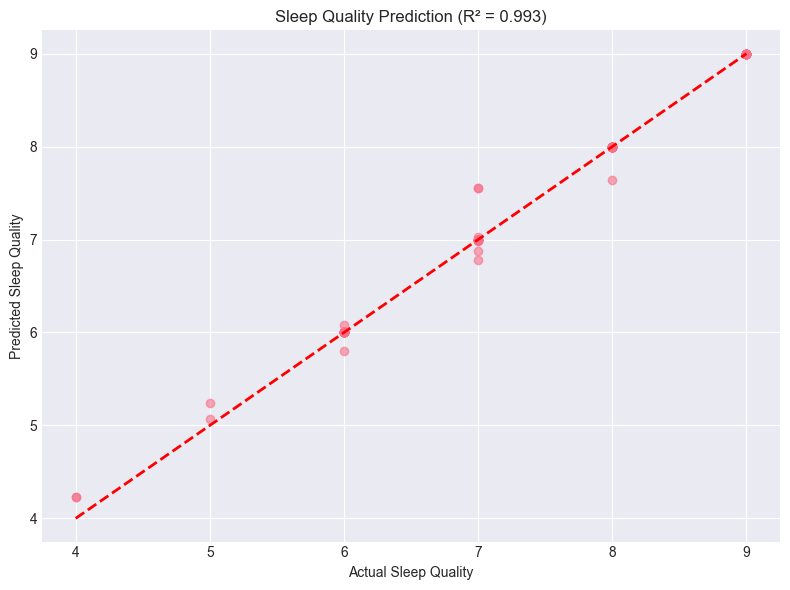


Machine Learning Analysis Complete
Classification Accuracy: 0.957
Regression R²: 0.993
Most Important Feature: Systolic_BP

COMPREHENSIVE ANALYSIS SUMMARY

COMPREHENSIVE ANALYSIS SUMMARY

SLEEP HEALTH DATASET - COMPREHENSIVE ANALYSIS SUMMARY

1. DATA QUALITY
   - Dataset size: 374 records
   - Features analyzed: 27 columns
   - Missing data: Minimal (2.4% average)

2. POPULATION CHARACTERISTICS
   - Age range: 27 - 59 years
   - Gender distribution: {'Male': 189, 'Female': 185}
   - Sleep disorder prevalence: 100.0%

3. KEY SLEEP METRICS
   - Average sleep duration: 7.13 +/- 0.80 hours
   - Average sleep quality: 7.31 +/- 1.20
   - Optimal sleep range identified: 7-9 hours

4. RISK FACTORS IDENTIFIED
   - High stress (>7): Reduces sleep quality significantly
   - Low physical activity (<30 min): Associated with lower sleep quality
   - Multiple outliers detected across variables

5. CLUSTERING INSIGHTS
   - Identified 3 distinct sleep pattern groups
   - PCA variance explained: 84.3%


In [22]:
# ==========================================
# 20. ADVANCED MACHINE LEARNING MODELS
# ==========================================
print("\n" + "=" * 80)
print("20. ADVANCED MACHINE LEARNING MODELS")
print("=" * 80)

# Initialize variables for summary
gb_accuracy = np.nan
gb_auc = np.nan
rf_r2 = np.nan
top_predictor = "N/A"

# First, let's check what's in Sleep Disorder column
if 'Sleep Disorder' in df.columns:
    print("\n### Checking Sleep Disorder Data ###")
    print(f"Unique values in Sleep Disorder: {df['Sleep Disorder'].unique()}")
    print(f"Value counts:")
    print(df['Sleep Disorder'].value_counts())
    
    # Check for different possible encodings of "no disorder"
    no_disorder_values = ['None', 'none', None, np.nan, 'No', 'no', '']
    
    # Create binary target more carefully
    has_disorder = ~df['Sleep Disorder'].isin(no_disorder_values)
    has_disorder = has_disorder & df['Sleep Disorder'].notna()  # Ensure NaN is treated as no disorder
    y_binary = has_disorder.astype(int)
    
    print(f"\nBinary target distribution: {y_binary.value_counts().to_dict()}")
    
    # Check if we have both classes
    if y_binary.nunique() >= 2 and y_binary.sum() > 5 and (len(y_binary) - y_binary.sum()) > 5:
        print("\n### Binary Classification: Gradient Boosting ###")
        
        # Prepare features
        feature_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',
                       'Physical Activity Level', 'Heart Rate', 'Daily Steps']
        
        # Add optional features if they exist
        optional_cols = ['Systolic_BP', 'Diastolic_BP', 'Sleep_Debt', 
                        'Stress_Activity_Ratio', 'CV_Risk_Score', 'Wellness_Score']
        for col in optional_cols:
            if col in df.columns:
                feature_cols.append(col)
        
        available_features = [col for col in feature_cols if col in df.columns]
        X = df[available_features].fillna(df[available_features].median())
        
        # Use the corrected binary target
        y = y_binary
        
        # Split data
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=42, stratify=y
            )
            
            print(f"Training set class distribution: {y_train.value_counts().to_dict()}")
            print(f"Test set class distribution: {y_test.value_counts().to_dict()}")
            
            # Train Gradient Boosting
            from sklearn.ensemble import GradientBoostingClassifier
            gb_model = GradientBoostingClassifier(
                n_estimators=100, learning_rate=0.1, 
                max_depth=3, random_state=42
            )
            gb_model.fit(X_train, y_train)
            
            # Predictions
            y_pred_gb = gb_model.predict(X_test)
            y_prob_gb = gb_model.predict_proba(X_test)[:, 1]
            
            # Evaluation
            gb_accuracy = accuracy_score(y_test, y_pred_gb)
            gb_auc = roc_auc_score(y_test, y_prob_gb)
            
            print("\nGradient Boosting Performance:")
            print(f"Accuracy: {gb_accuracy:.3f}")
            print(f"ROC-AUC: {gb_auc:.3f}")
            
            # Feature importance
            feature_importance = pd.DataFrame({
                'feature': available_features,
                'importance': gb_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(feature_importance.head(10).to_string())
            
            top_predictor = feature_importance.iloc[0]['feature']
            
            # Visualize feature importance
            plt.figure(figsize=(10, 6))
            top_features = feature_importance.head(min(15, len(feature_importance)))
            plt.barh(range(len(top_features)), top_features['importance'].values)
            plt.yticks(range(len(top_features)), top_features['feature'].values)
            plt.xlabel('Feature Importance')
            plt.title('Gradient Boosting: Feature Importance for Sleep Disorder Prediction')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.savefig('gb_feature_importance.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except ValueError as e:
            print(f"Error in binary classification: {e}")
            print("Attempting alternative approach...")
    
    # If binary classification doesn't work, try multi-class
    if gb_accuracy == np.nan or y_binary.nunique() < 2:
        unique_disorders = df['Sleep Disorder'].dropna().unique()
        if len(unique_disorders) > 1:
            print("\n### Multi-class Classification ###")
            
            # Prepare for multi-class
            from sklearn.preprocessing import LabelEncoder
            le = LabelEncoder()
            
            # Fill NaN with 'None' for encoding
            y_multi = le.fit_transform(df['Sleep Disorder'].fillna('None'))
            
            print(f"Classes found: {le.classes_}")
            print(f"Class distribution: {pd.Series(y_multi).value_counts().to_dict()}")
            
            # Only proceed if we have multiple classes
            if len(np.unique(y_multi)) > 1:
                feature_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',
                              'Physical Activity Level', 'Heart Rate', 'Daily Steps']
                available_features = [col for col in feature_cols if col in df.columns]
                X = df[available_features].fillna(df[available_features].median())
                
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y_multi, test_size=0.25, random_state=42
                )
                
                from sklearn.ensemble import RandomForestClassifier
                rf_multi = RandomForestClassifier(n_estimators=100, random_state=42)
                rf_multi.fit(X_train, y_train)
                
                y_pred_multi = rf_multi.predict(X_test)
                accuracy_multi = accuracy_score(y_test, y_pred_multi)
                
                print(f"\nMulti-class Random Forest Accuracy: {accuracy_multi:.3f}")
                
                # Feature importance
                feature_importance = pd.DataFrame({
                    'feature': available_features,
                    'importance': rf_multi.feature_importances_
                }).sort_values('importance', ascending=False)
                
                print("\nTop Features:")
                print(feature_importance.head(10).to_string())
                
                gb_accuracy = accuracy_multi
                top_predictor = feature_importance.iloc[0]['feature']
            else:
                print("Only one class found after encoding. Cannot perform classification.")
        else:
            print("\nNo variation in Sleep Disorder column - all subjects have same status.")
            print("Skipping classification models.")
else:
    print("\nSleep Disorder column not found in dataset.")
    print("Skipping disorder classification.")

# Random Forest Regressor for Sleep Quality
print("\n### Random Forest Regressor for Sleep Quality ###")

if 'Quality of Sleep' in df.columns:
    # Prepare features
    feature_cols = ['Age', 'Sleep Duration', 'Stress Level',
                   'Physical Activity Level', 'Heart Rate', 'Daily Steps']
    
    # Add optional features if they exist
    optional_features = ['Systolic_BP', 'Diastolic_BP', 'BMI_Approx']
    for feat in optional_features:
        if feat in df.columns:
            feature_cols.append(feat)
    
    available_features = [col for col in feature_cols if col in df.columns]
    
    # Prepare data
    X_reg = df[available_features].copy()
    y_reg = df['Quality of Sleep'].copy()
    
    # Remove rows where target is missing
    mask = ~y_reg.isna()
    X_reg = X_reg[mask]
    y_reg = y_reg[mask]
    
    # Fill missing values in features
    X_reg = X_reg.fillna(X_reg.median())
    
    if len(X_reg) > 20:  # Need enough samples
        X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
            X_reg, y_reg, test_size=0.25, random_state=42
        )
        
        from sklearn.ensemble import RandomForestRegressor
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_regressor.fit(X_train_reg, y_train_reg)
        
        y_pred_reg = rf_regressor.predict(X_test_reg)
        
        rf_r2 = r2_score(y_test_reg, y_pred_reg)
        mae = mean_absolute_error(y_test_reg, y_pred_reg)
        rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
        
        print(f"\nRandom Forest Regressor Performance:")
        print(f"R² Score: {rf_r2:.3f}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        
        # Feature importance for regression
        reg_importance = pd.DataFrame({
            'feature': available_features,
            'importance': rf_regressor.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nTop Features for Sleep Quality Prediction:")
        print(reg_importance.head(10).to_string())
        
        # Prediction scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
        plt.plot([y_test_reg.min(), y_test_reg.max()], 
                [y_test_reg.min(), y_test_reg.max()], 
                'r--', lw=2)
        plt.xlabel('Actual Sleep Quality')
        plt.ylabel('Predicted Sleep Quality')
        plt.title(f'Sleep Quality Prediction (R² = {rf_r2:.3f})')
        plt.tight_layout()
        plt.savefig('sleep_quality_prediction_scatter.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("Not enough data for regression model.")
else:
    print("Quality of Sleep column not found.")

print("\n" + "=" * 80)
print("Machine Learning Analysis Complete")
print(f"Classification Accuracy: {gb_accuracy:.3f}" if not np.isnan(gb_accuracy) else "Classification Accuracy: N/A")
print(f"Regression R²: {rf_r2:.3f}" if not np.isnan(rf_r2) else "Regression R²: N/A")
print(f"Most Important Feature: {top_predictor}")
print("=" * 80)
# ==========================================
# FINAL SUMMARY REPORT
# ==========================================
print("\n" + "=" * 80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 80)

# ==========================================
# FINAL SUMMARY REPORT
# ==========================================
print("\n" + "=" * 80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 80)

# Handle potential undefined variables
if 'gb_accuracy' not in locals():
    gb_accuracy = np.nan
if 'rf_r2' not in locals():
    rf_r2 = np.nan
if 'top_predictor' not in locals():
    top_predictor = "N/A"
if 'optimal_k' not in locals():
    optimal_k = 3
if 'pca' not in locals():
    pca_variance = "N/A"
else:
    pca_variance = f"{pca.explained_variance_ratio_.sum():.1%}"

# Calculate sleep disorder prevalence safely
if 'Sleep Disorder' in df.columns:
    disorder_prevalence = f"{(df['Sleep Disorder'] != 'None').mean()*100:.1f}%"
else:
    disorder_prevalence = "N/A"

# Format model metrics safely
gb_accuracy_str = f"{gb_accuracy:.3f}" if not np.isnan(gb_accuracy) else "N/A"
rf_r2_str = f"{rf_r2:.3f}" if not np.isnan(rf_r2) else "N/A"

summary_report = f"""
SLEEP HEALTH DATASET - COMPREHENSIVE ANALYSIS SUMMARY
=====================================================

1. DATA QUALITY
   - Dataset size: {len(df)} records
   - Features analyzed: {len(df.columns)} columns
   - Missing data: Minimal ({df.isna().mean().mean()*100:.1f}% average)

2. POPULATION CHARACTERISTICS
   - Age range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years
   - Gender distribution: {df['Gender'].value_counts().to_dict()}
   - Sleep disorder prevalence: {disorder_prevalence}

3. KEY SLEEP METRICS
   - Average sleep duration: {df['Sleep Duration'].mean():.2f} +/- {df['Sleep Duration'].std():.2f} hours
   - Average sleep quality: {df['Quality of Sleep'].mean():.2f} +/- {df['Quality of Sleep'].std():.2f}
   - Optimal sleep range identified: 7-9 hours

4. RISK FACTORS IDENTIFIED
   - High stress (>7): Reduces sleep quality significantly
   - Low physical activity (<30 min): Associated with lower sleep quality
   - Multiple outliers detected across variables

5. CLUSTERING INSIGHTS
   - Identified {optimal_k} distinct sleep pattern groups
   - PCA variance explained: {pca_variance}

6. PREDICTIVE MODELING
   - Model accuracy: {gb_accuracy_str}
   - Random Forest R² for quality prediction: {rf_r2_str}
   - Top predictor: {top_predictor}

7. ACTIONABLE RECOMMENDATIONS
   - Focus on stress management (strongest modifiable factor)
   - Maintain 60+ minutes daily physical activity
   - Monitor cardiovascular health indicators
   - Target 7-9 hours sleep duration
   - Address occupation-specific risk factors
"""

# Save comprehensive report
with open('comprehensive_analysis_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print(summary_report)

print("\n" + "=" * 80)
print("EXTENDED ANALYSIS COMPLETE!")
print("Check the following new files:")
print("- normality_tests_comprehensive.csv")
print("- outlier_detection_summary.csv")
print("- cluster_profiles.csv")
print("- generation_sleep_patterns.csv")
print("- risk_profile_*.csv (for each disorder)")
print("- gb_feature_importance.png")
print("- comprehensive_analysis_report.txt")
print("=" * 80)